[0.5, 33.5] [4.5, 4.5]


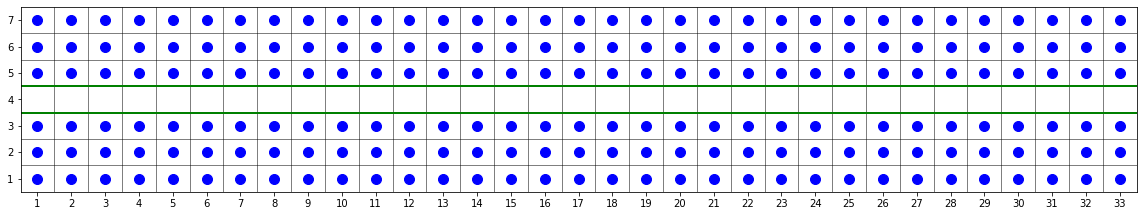

In [36]:
# 加载库
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
from random import shuffle

# 函数：绘制网格线
def plot_line():
    # 绘制网格线
    q = range(1,L + 1)
    plt.xticks(range(1,L + 1,1),q)
    plt.xlim(0.5,L + 0.5)
    plt.ylim(0.5,w + 0.5)
    for i in range(1,L):
        x = [i+0.5,i+0.5]
        y = [0.5,w + 0.5]
        plt.plot(x,y,'-k',linewidth = 0.5)
    for j in range(1,w):
        x = [0.5,L + 0.5]
        y = [j+0.5,j+0.5]
        plt.plot(x,y,'-k',linewidth = 0.5)
    
    # 绘制分割线
    y= [Lw + 0.5,Lw + 0.5]
    x = [0.5,L + 0.5]
    #x = [Lw + 0.5,Lw + 0.5]
    #y = [0.5,w + 0.5]
    print(x,y)
    plt.plot(x,y,'-g',linewidth = 2)

    y= [w-Lw + 0.5,w-Lw + 0.5]
    x = [0.5,L + 0.5]
    #x = [L - Lw + 0.5,L - Lw + 0.5]
    #y = [0.5,w + 0.5]
    plt.plot(x,y,'-g',linewidth = 2)
    # 设置坐标刻度
    
    xz = range(1,L + 1) 
    plt.xticks(range(1,L + 1,1),xz)   # 横坐标刻度是整数
    #yz = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T']
    #plt.yticks(range(1,w + 1,1),yz)   # 纵坐标刻度是字母


# 参数调整区域
w = 7    # 宽度
L = 33    # 长度
Lw = 4    # 等待区长度
dx = 10
# 创建图像
def poltPic(x1,y1):
    fig = plt.figure(figsize = (20,3.4))
    ax = plt.axes()
    plt.xlim(0.5,L + 0.5)
    plt.ylim(0.5,w + 0.5)
    plt.plot(x1,y1,'ob',markersize = dx)
    plot_line()

ll=list(range(1,199))
shuffle(ll)
x1 = []
y1 = []
for i in range(199):
    _x = int((ll[i-1]-1) / 6 +1)
    _y = int((ll[i-1]-1) % 6 +1)
    if _y>3 : _y = 1 + _y
    x1.append(_x)    
    y1.append(_y)
poltPic(x1,y1)
#plt.pause(sxtime)
    
# 显示图片
#plt.show()


# 二维仿真模型的思路和程序设计（以二维CA对向行人流为例）



7


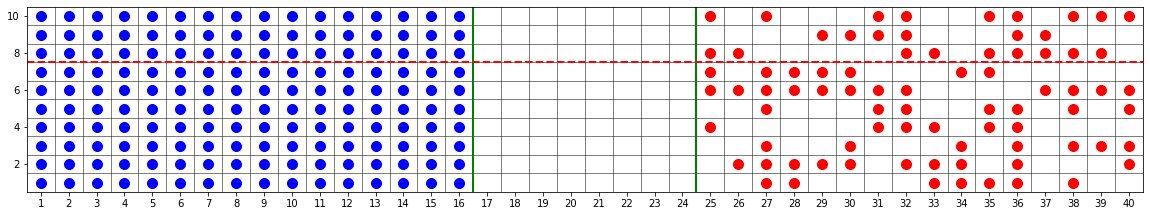

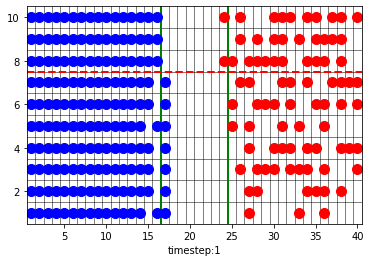

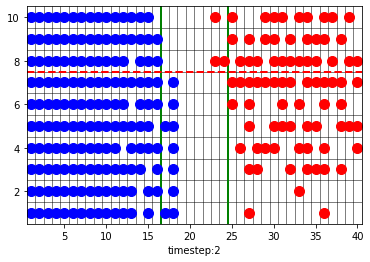

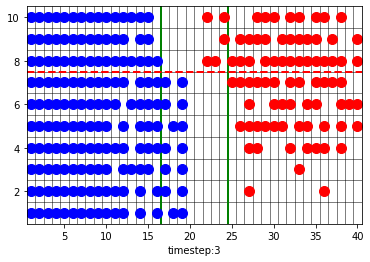

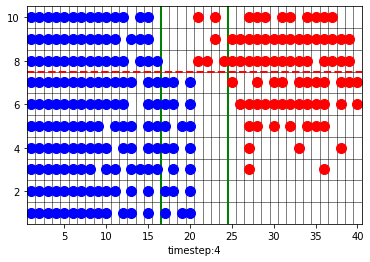

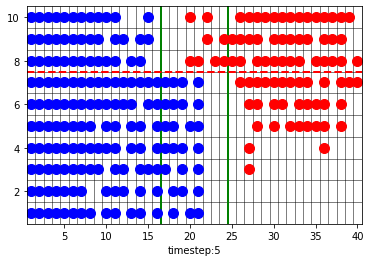

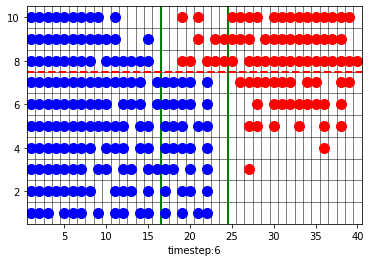

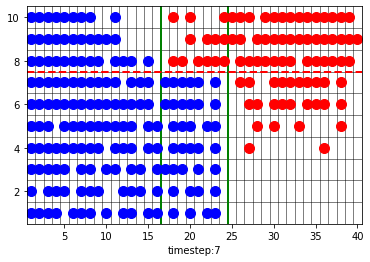

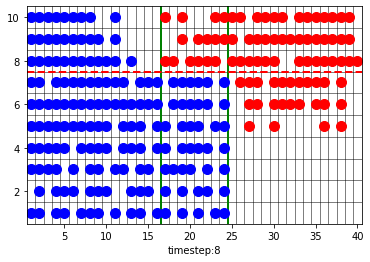

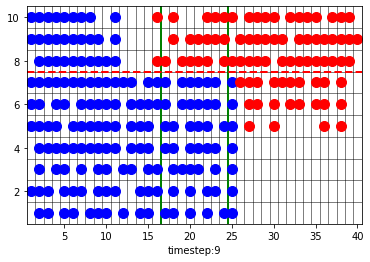

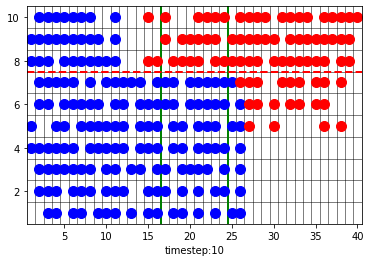

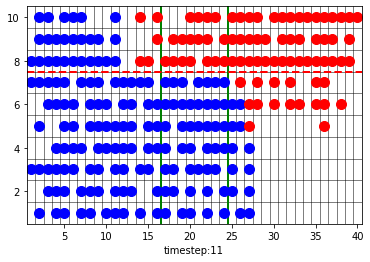

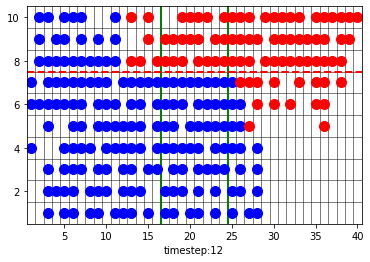

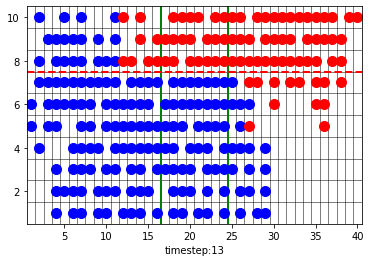

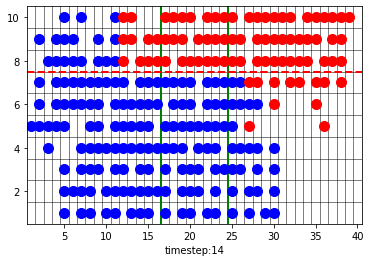

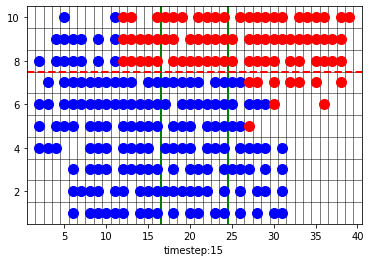

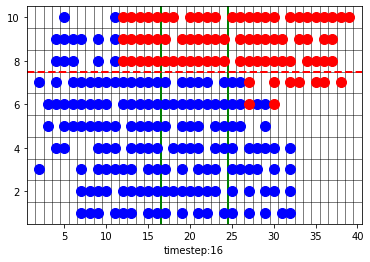

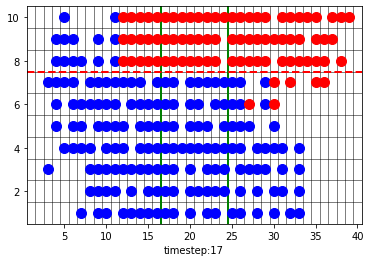

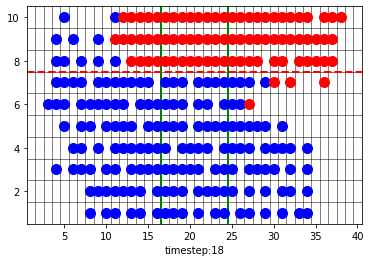

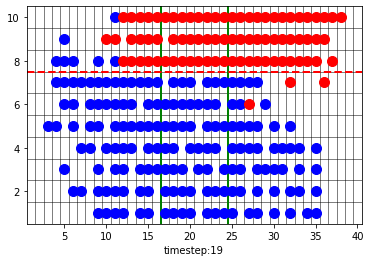

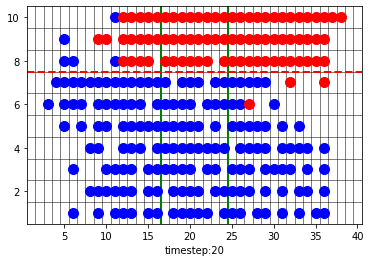

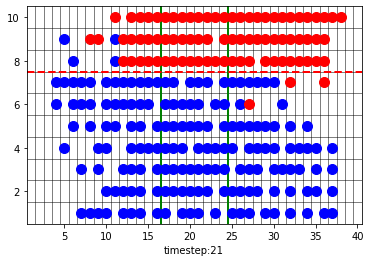

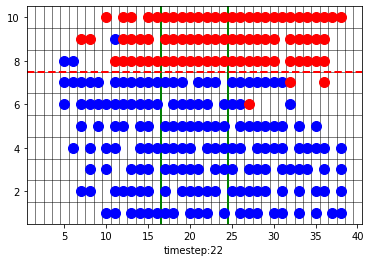

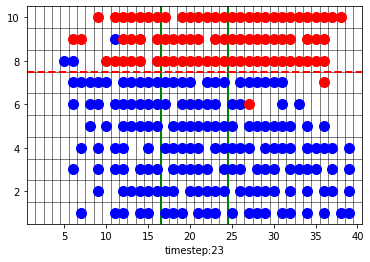

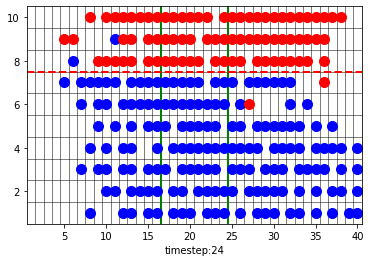

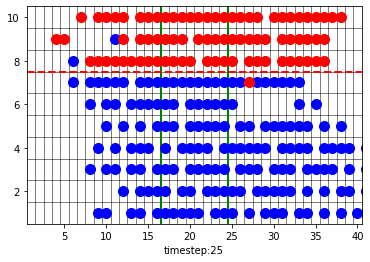

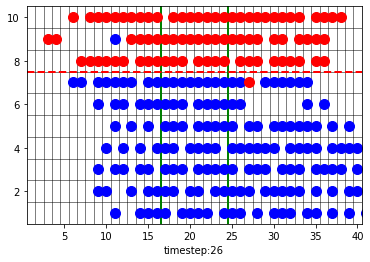

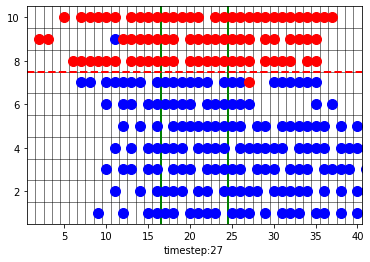

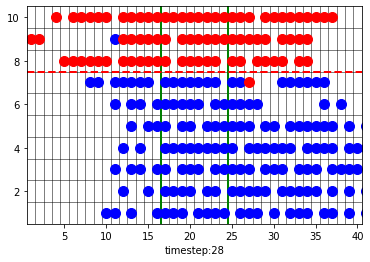

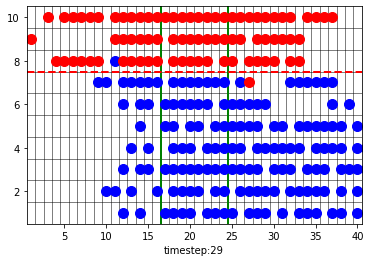

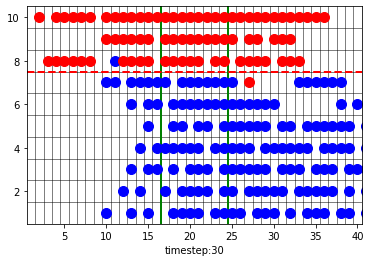

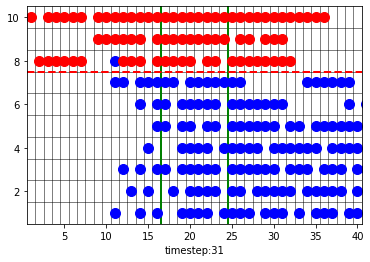

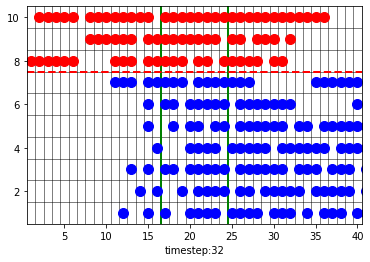

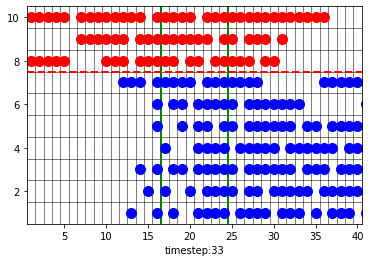

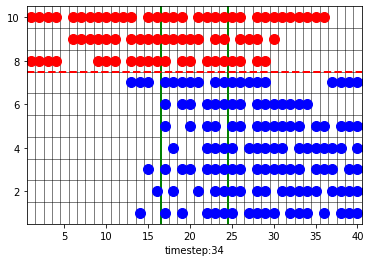

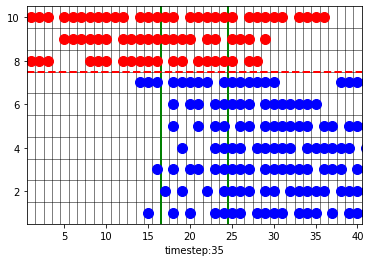

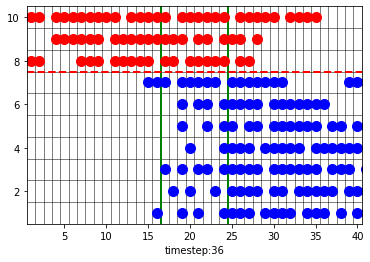

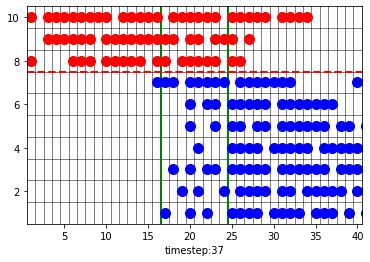

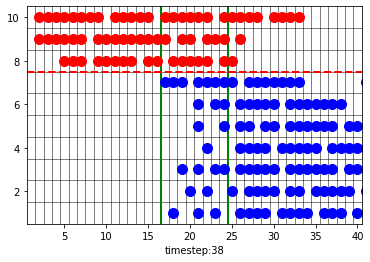

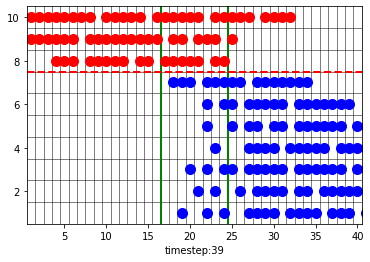

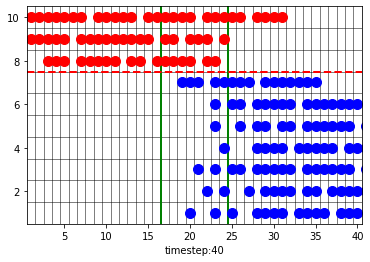

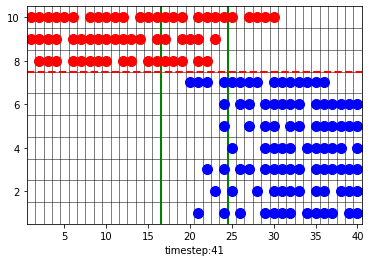

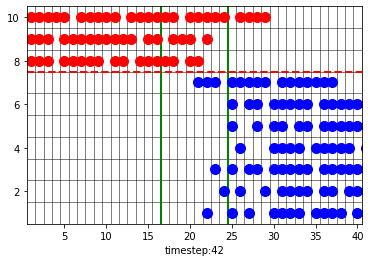

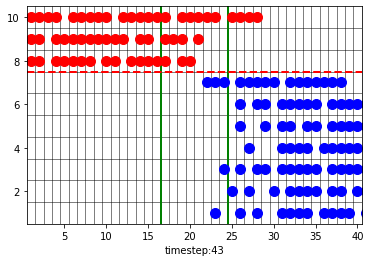

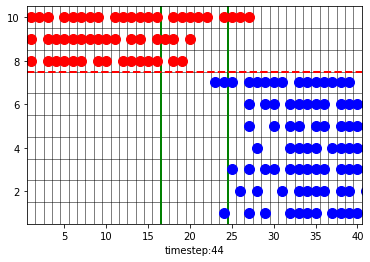

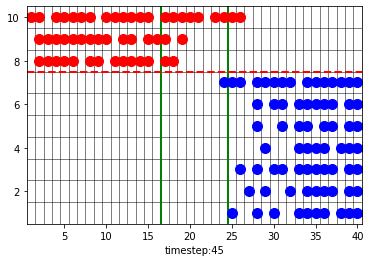

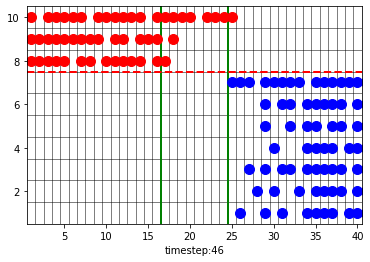

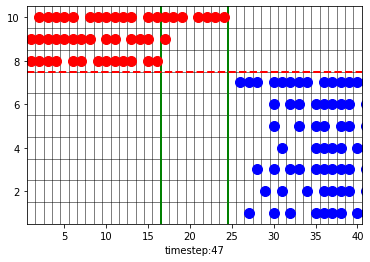

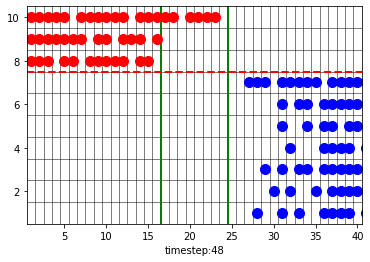

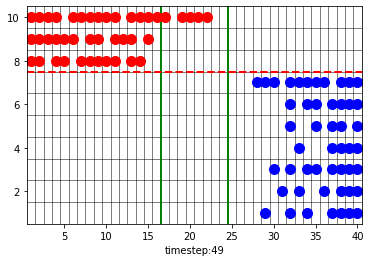

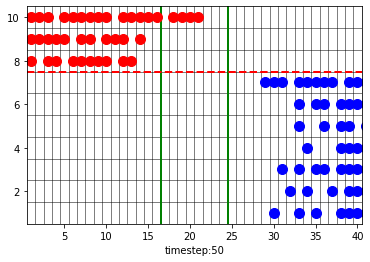

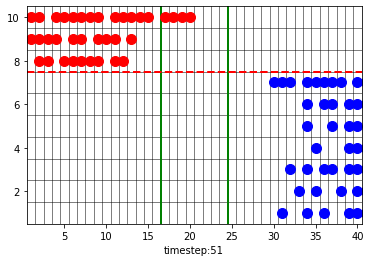

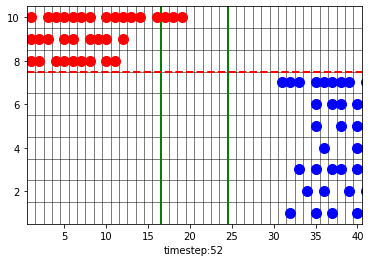

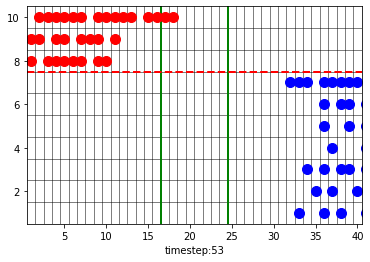

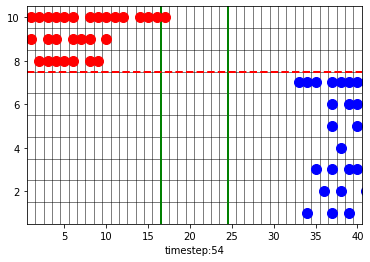

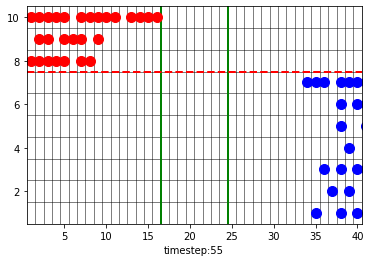

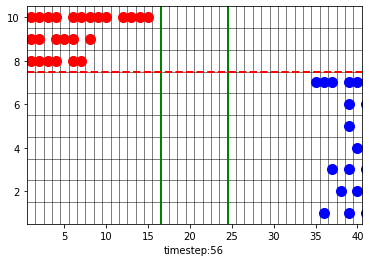

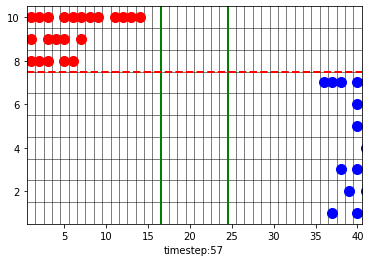

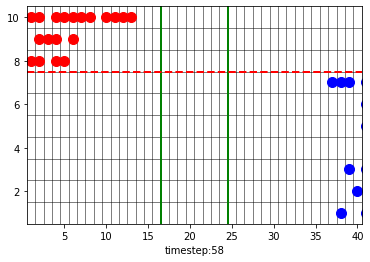

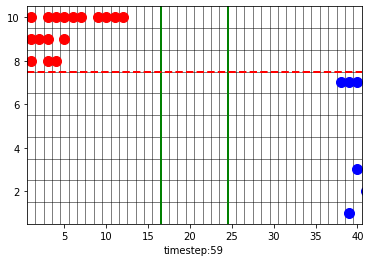

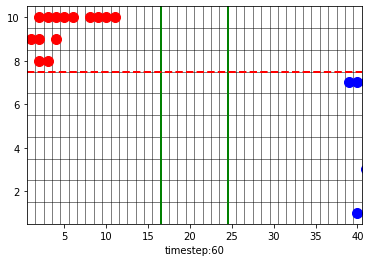

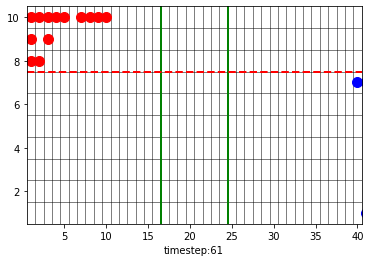

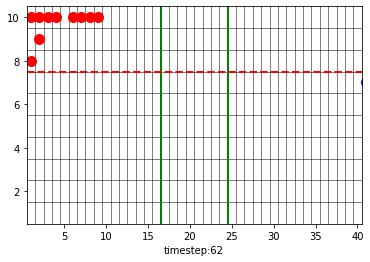

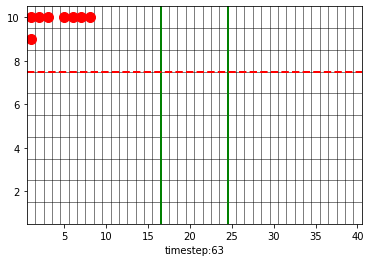

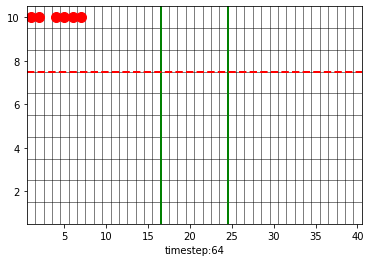

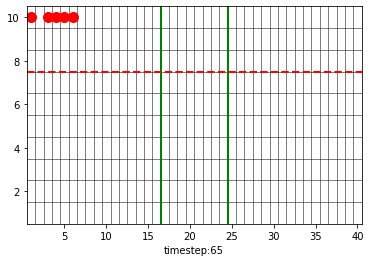

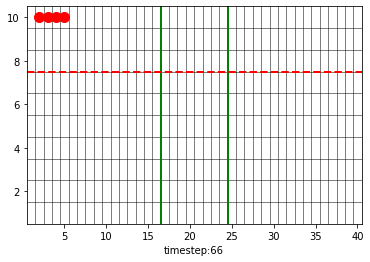

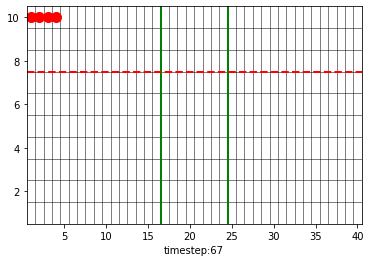

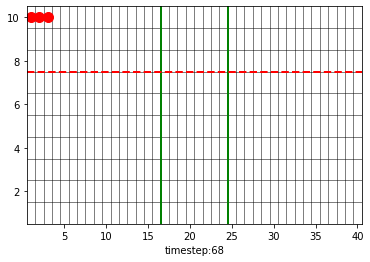

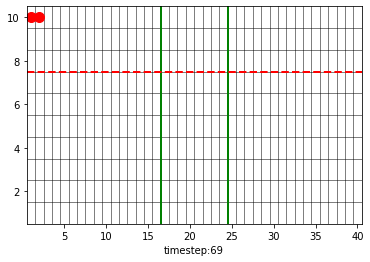

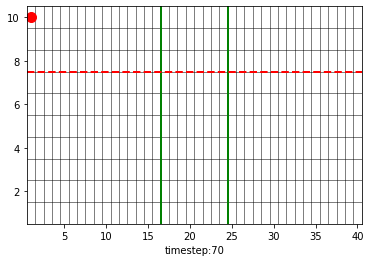

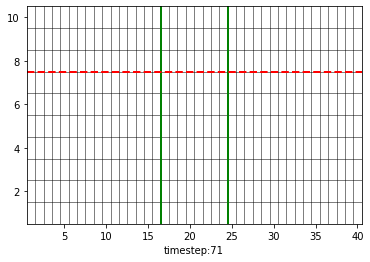

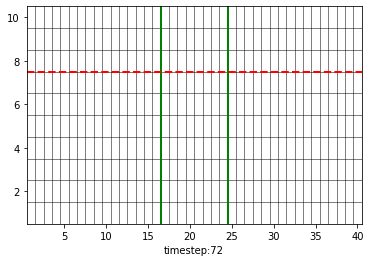

疏散用时：72


<Figure size 432x288 with 0 Axes>

In [7]:
# ——————01 调用包——————————
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random

# ——————02 调参区—————————

# 系统中的人数（<=160）
numof_z = 160
numof_y = 80
# 前进概率
p = 1
# 慢化前进概率
p2 = 0
# 时间步
sjb = 200
# 刷新时间
sxtime = 0.01
# 宽度
w = 10
# 长度
L = 40
# 等待区长度
Lw = 16
# 点的大小
dx = 10
# gama
dc = 5
# ——————————————————

# ——————03 创建图像————————
fig = plt.figure(figsize = (20,3.4))
ax = plt.axes()
plt.xlim(0.5,L + 0.5)
plt.ylim(0.5,w + 0.5)
xz = range(1,L + 1)
plt.xticks(range(1,L + 1,1),xz)

# 计算左右侧行人比例
fgx = round(numof_z/(numof_z + numof_y) * w)
if fgx > (w - 2):
    fgx = w - 2
elif fgx < 2:
    fgx = 2
print(fgx)

def plot_line():
    # 绘制网格线
    for i in range(1,L):
        x = [i+0.5,i+0.5]
        y = [0.5,w + 0.5]
        plt.plot(x,y,'-k',linewidth = 0.5)
    for j in range(1,w):
        x = [0.5,L + 0.5]
        y = [j+0.5,j+0.5]
        plt.plot(x,y,'-k',linewidth = 0.5)
    # 绘制分割线
    x = [Lw + 0.5,Lw + 0.5]
    y = [0.5,w + 0.5]
    plt.plot(x,y,'-g',linewidth = 2)
    x = [L - Lw + 0.5,L - Lw + 0.5]
    y = [0.5,w + 0.5]
    plt.plot(x,y,'-g',linewidth = 2)
    # 绘制分割线
    x = [0.5, L + 0.5]
    y = [fgx + 0.5, fgx + 0.5]
    plt.plot(x,y,'--r',linewidth = 2)

# ——————————————————

# ——————04 随机生成初始元胞——————————

# 随机生成初始元胞(左)
num = 0
lisz = []
while num != (numof_z):
    sjs = random.randint(1,w * Lw)
    if ((sjs in lisz) == 0):
        lisz.append(sjs)
        num += 1
#print(lisz)
x1 = []
y1 = []
for i in range(0,len(lisz)):
    x1.append(int((lisz[i] - 1) / w) + 1)
    y1.append(lisz[i] - (x1[i] - 1) * w)
plt.plot(x1,y1,'ob',markersize = dx)

# 随机生成初始元胞(右)
num = 0
lisy = []
while num != (numof_y):
    sjs = random.randint(w * (L - Lw) + 1,w * L)
    if ((sjs in lisy) == 0):
        lisy.append(sjs)
        num += 1
#print(lisy)
x1 = []
y1 = []
for i in range(0,len(lisy)):
    x1.append(int((lisy[i] - 1) / w) + 1)
    y1.append(lisy[i] - (x1[i] - 1) * w)
plt.plot(x1,y1,'or',markersize = dx)
plot_line()
plt.pause(1)
plt.cla()

#——————————————————————————————

#————————05 开始时间步循环—————————————
# 疏散时间
sssj = 0
for m in range(0,sjb):
    sssj += 1
    xz = []
    yz = []
    xy = []
    yy = []
    lis = []
    # 左侧元胞
    for n in range(0, len(lisz)):
        lis = lisz + lisy
        cell_x = lisz[n] % w
        if cell_x == 0:
            cell_x = w
        # 如果元胞已经靠右
        if cell_x <= fgx:
            # 能前进就以概率p前进
            if ((lisz[n] + w) in lis) == 0:
                sjs = random.randint(1,10)
                if (sjs/10 <= p):
                    lisz[n] += w
            # 否则选择随机左转或右转
            else:
                zht = []
                # 可以上移的条件
                if (lisz[n] % w < fgx) and (((lisz[n] + 1) in lis) == 0):
                    zht.append(1)
                # 可以下移的条件
                if (lisz[n] % w != 1) and (((lisz[n] - 1) in lis) == 0):
                    zht.append(-1)
                # 判断是否上下移
                if zht != []:
                    sjs = random.randint(0,(len(zht)-1))
                    lisz[n] += zht[sjs]
        # 如果元胞还未靠右
        else:
            # 若能下移就下移
            if (((lisz[n] - 1) in lis) == 0):
                lisz[n] -= 1
            else:  # 以一个较慢的前进概率前移
                if ((lisz[n] + w) in lis) == 0:
                    sjs = random.randint(1,10)
                    if (sjs/10 <= p2):
                        lisz[n] += w
        xz.append(int((lisz[n] - 1) / w) + 1)
        yz.append(lisz[n] - (xz[n] - 1) * w)

    # 右侧元胞
    for n in range(0, len(lisy)):
        lis = lisz + lisy
        cell_x = lisy[n] % w
        if cell_x == 0:
            cell_x = w
        # 如果元胞已经靠右
        if cell_x > fgx:
            # 能前进就以概率p前进
            if ((lisy[n] - w) in lis) == 0:
                sjs = random.randint(1,10)
                if (sjs/10 <= p):
                    lisy[n] -= w
            # 否则选择随机左转或右转
            else:
                zht = []
                # 可以上移的条件
                if (lisy[n] % w != 0) and (((lisy[n] + 1) in lis) == 0):
                    zht.append(1)
                # 可以下移的条件
                if (lisy[n] % w > (fgx+1)) and (((lisy[n] - 1) in lis) == 0):
                    zht.append(-1)
                # 判断是否上下移
                if zht != []:
                    sjs = random.randint(0,(len(zht)-1))
                    lisy[n] += zht[sjs]
        # 如果元胞还未靠右
        else:
            # 若能上移就上移
            if (((lisy[n] + 1) in lis) == 0):
                lisy[n] += 1
            else:  # 以一个较慢的前进概率前移
                if ((lisy[n] - w) in lis) == 0:
                    sjs = random.randint(1,10)
                    if (sjs/10 <= p2):
                        lisy[n] -= w
        xy.append(int((lisy[n] - 1) / w) + 1)
        yy.append(lisy[n] - (xy[n] - 1) * w)
 
    plot_line()
    plt.plot(xz,yz,'ob',markersize = dx)
    plt.plot(xy,yy,'or',markersize = dx)
    plt.xlabel('timestep:' + str(sssj))
    plt.xlim(0.5, L+0.5)
    plt.ylim(0.5, w+0.5)
    plt.pause(sxtime)
    #plt.cla()
    plt.clf()
    # 判断停止时间
    if ((min(lisz)) > L*w and (max(lisy)) < 0):
        break
print("疏散用时：" + str(sssj))